# Code to reproduce manuscript figures
### Kristin Fullerton | krl4005@med.cornell.edu


In [86]:
# IMPORT FUNCTIONS
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter
import numpy as np
import matplotlib.pyplot as plt

##########################################################################################################################################################
# SET UP FIGURE PARAMETERS
plt.rcParams['font.size'] = 12 
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['savefig.transparent'] = True
plt.rcParams['figure.constrained_layout.use'] = True

class ScalarFormatterClass(ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"

yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))

##########################################################################################################################################################
# LOAD DATA

data_path = '../new_ga_data/data/'
figures_path = '../new_ga_data/figures/'

#all_trials =  generate_alldata(data_path, trials = ['trial1', 'trial2', 'trial3', 'trial4', 'trial5', 'trial6', 'trial7', 'trial8', 'trial9', 'trial10'])
#all_trials.to_csv(data_path+'all_trials.csv')
all_trials = pd.read_csv(data_path+'all_trials.csv')
all_trials_old = pd.read_csv('./data/all_data.csv.bz2')

fig2_data = all_trials[(all_trials['gen']==0) | (all_trials['gen']==50) | (all_trials['gen']==199)]
fig2_data = fig2_data[fig2_data['rrc']!=5.000000e+07] 
fig2_data = fig2_data[['gen', 'trial', 'fitness', 'rrc', 't', 'v', 'cai']]

#cond_data = pickle.load(open(data_path+'/cond_data.pkl', 'rb'))
#robust_data = pickle.load(open(data_path+'/robust_data.pkl', 'rb'))

best_data = all_trials[(all_trials['fitness']==0) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)]
best_data.reset_index(inplace=True)

#rrc_data = pd.read_csv(data_path+'/rrc_data.csv.bz2')
#sens_data = pd.read_csv(data_path+'/sens_opt.csv.bz2')
#sens_data_base = pd.read_csv(data_path+'/sens_baseline.csv.bz2')
#sens_data_grandi = pd.read_csv(data_path+'/sens_grandi.csv.bz2')



# Figure 2
**A genetic algorithm that optimizes for RRC while ensuring physiologic morphology**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_9016/1249574746.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'fig2.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_9016/1249574746.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'fig2.png', trasparent=True)


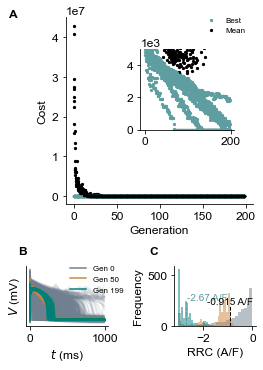

In [43]:
# SET UP FIGURE
fig = plt.figure(figsize = (3.5, 5)) 
gs = GridSpec(nrows=2, ncols=1, figure = fig, height_ratios=[1, 0.5]) 

sub4 = fig.add_subfigure(gs[0])
axs4= sub4.subplots()

sub5 = fig.add_subfigure(gs[1])
axs5 = sub5.subplots(1, 2)

##########################################################################################################################################################
# A) ERROR PLOT
axs4_in = axs4.inset_axes([0.4, 0.4, 0.5, 0.43])

for i in list(range(0, max(all_trials['trial'])+1)):

    d = all_trials[all_trials['trial']==i]
    bsts = []
    avgs = []

    for g in list(range(0, max(d['gen']))):
        d_gen = d[d['gen']==g]['fitness'].to_list()
        bsts.append(min(d_gen))
        avgs.append(np.mean(d_gen))

    axs4.scatter(list(range(0, max(d['gen']))), bsts, color = 'cadetblue', s=5)
    axs4.scatter(list(range(0, max(d['gen']))), avgs, color = 'black', s=5)
    axs4_in.scatter(list(range(0, max(d['gen']))), bsts, color = 'cadetblue', s=5)
    axs4_in.scatter(list(range(0, max(d['gen']))), avgs, color = 'black', s=5)

axs4.set_ylabel('Cost')
axs4.set_xlabel('Generation');
#axs4_in.set_ylim([-16000, 23000])
#axs4.indicate_inset_zoom(axs4_in, edgecolor="black", alpha = 1)
axs4_in.set_ylim([0, 5000])
axs4_in.legend(['Best', 'Mean'], loc='upper right', bbox_to_anchor = (1.2,1.5), frameon = False, fontsize=8)
axs4_in.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

##########################################################################################################################################################
# B) AP and C) RRC PLOTs
gens = [0, 50, 199]
colors = ['slategrey', 'peru', 'teal']
for g in list(range(0, len(gens))):
    #HISTOGRAM
    axs5[1].hist(-fig2_data[fig2_data['gen']==gens[g]]['rrc']*10, color = colors[g], bins = 25, label = str(gens[g]), alpha = 0.5) 

    for i in list(range(0, len(fig2_data[fig2_data['gen']==gens[g]]['gen']))):
        ind = fig2_data[fig2_data['gen']==gens[g]].sort_values('fitness').reset_index().iloc[i]
        
        # AP TRACES
        #if eval(ind['t']) != 50000000:
        axs5[0].plot(eval(ind['t']), eval(ind['v']), color = colors[g], alpha = 0.1)
        if i == len(fig2_data[fig2_data['gen']==gens[g]]['gen'])-1:
            axs5[0].plot(eval(ind['t']), eval(ind['v']), color = colors[g], label = 'Gen '+str(gens[g]))

axs5[0].set_ylabel('$V$ (mV)')
axs5[0].set_xlabel('$t$ (ms)')
axs5[0].tick_params(left=False)
axs5[0].tick_params(labelleft=False)
axs5[0].legend(frameon=False, loc = (0.5,0.5), fontsize=8)

axs5[1].set_ylabel('Frequency')
axs5[1].set_xlabel('RRC (A/F)')

# ANNOTATION
mean_rrc = np.mean(-fig2_data[fig2_data['gen']==gens[-1]]['rrc']*10)
axs5[1].plot([mean_rrc, mean_rrc], [0, 240], color = 'cadetblue', linestyle = 'dashed', linewidth= 1)
axs5[1].annotate(str(round(mean_rrc, 2))+' A/F', (-1.8, 250), ha='center', fontsize = 10, color = 'cadetblue')
axs5[1].plot([-0.915, -0.915], [0, 200], color = 'black', linestyle = 'dashed', linewidth= 1)
axs5[1].annotate('-0.915 A/F', (-0.915, 210), ha='center', fontsize = 10, color = 'black')

##########################################################################################################################################################
# LETTER LABELS
axs4.text(-0.3, 1, 'A', transform=axs4.transAxes, weight='bold')
axs5[0].text(-0.1, 1.2, 'B', transform=axs5[0].transAxes, weight='bold')
axs5[1].text(-0.3, 1.2, 'C', transform=axs5[1].transAxes, weight='bold')

##########################################################################################################################################################
# SAVE FIGURE
plt.savefig(figures_path+'fig2.pdf', trasparent=True)
plt.savefig(figures_path+'fig2.png', trasparent=True)

# Figure 3
**The best individuals found by the genetic algorithm are physiologic and allow for an 80% increase in RRC compared to baseline.**


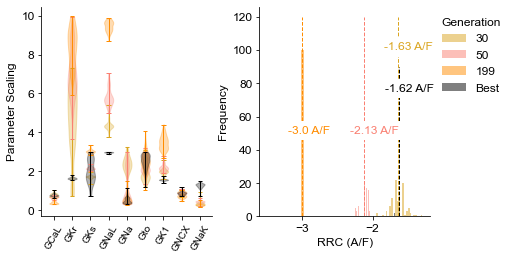

In [157]:
fig, axs1 = plt.subplots(1, 2, figsize = (7,3.5), constrained_layout = True)
gens = [30, 50, 199]
labels = [str(gen) for gen in gens]
colors = ['goldenrod', 'salmon','darkorange']

for g in range(0, len(gens)):
    data = all_trials[(all_trials['gen']==gens[g])].sort_values(by=['fitness']).reset_index().iloc[0:100]
    #data = all_trials[(all_trials['gen']==gens[g])]
    violin = axs1[0].violinplot(data.filter(like = 'multiplier'))
    axs1[1].hist(-data['rrc']*10, color = colors[g], bins = 25, label = labels[g], alpha = 0.5)
    mean_rrc = np.mean(-data['rrc']*10)
    axs1[1].plot([mean_rrc, mean_rrc], [0, 120], color = colors[g], linestyle = 'dashed', linewidth= 1)
    if g == 0:
        height = 100
    else:
        height = 50
    axs1[1].annotate(str(round(mean_rrc,2))+' A/F', ((mean_rrc)-0.2,height), bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2), color = colors[g])
    
    for vp in violin['bodies']:
        vp.set_facecolor(colors[g])
        vp.set_edgecolor(colors[g])

    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(colors[g])
        vp.set_linewidth(1)


#data = all_trials_old[(all_trials_old['gen']==99)].sort_values(by=['fitness']).reset_index().iloc[0:100]
data = pd.read_csv('./data/best_data.csv.bz2')
violin = axs1[0].violinplot(data.filter(like = 'multiplier'))
axs1[1].hist(-data['rrc'].iloc[0:80]*10, color = 'black', bins = 25, alpha = 0.5, label = 'Best')
mean_rrc = np.mean(-data['rrc']*10)
axs1[1].plot([mean_rrc, mean_rrc], [0, 90], color = 'black', linestyle = 'dashed', linewidth= 1)
axs1[1].annotate(str(round(mean_rrc,2))+' A/F', ((mean_rrc)-0.2,75), bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2), color = 'black')

for vp in violin['bodies']:
    vp.set_facecolor('black')
    vp.set_edgecolor('black')

for partname in ('cbars','cmins','cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)

axs1[0].set_ylabel('Parameter Scaling')
axs1[0].set_xticks(list(range(1, 10)))
axs1[0].set_xticklabels(['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK'], rotation = 60, fontsize = 10);

axs1[1].set_ylabel('Frequency')
axs1[1].set_xlabel('RRC (A/F)')
axs1[1].legend(bbox_to_anchor = (1,1), frameon=False, title = 'Generation')
